# Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail(70)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


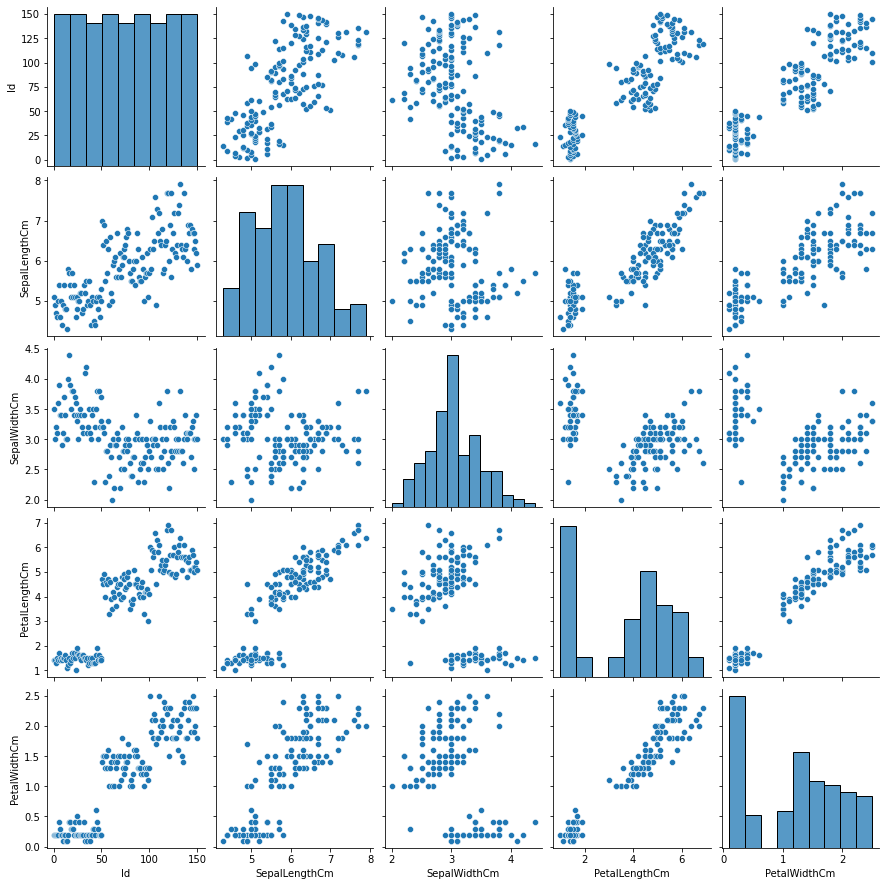

In [6]:
sns.pairplot(iris)

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


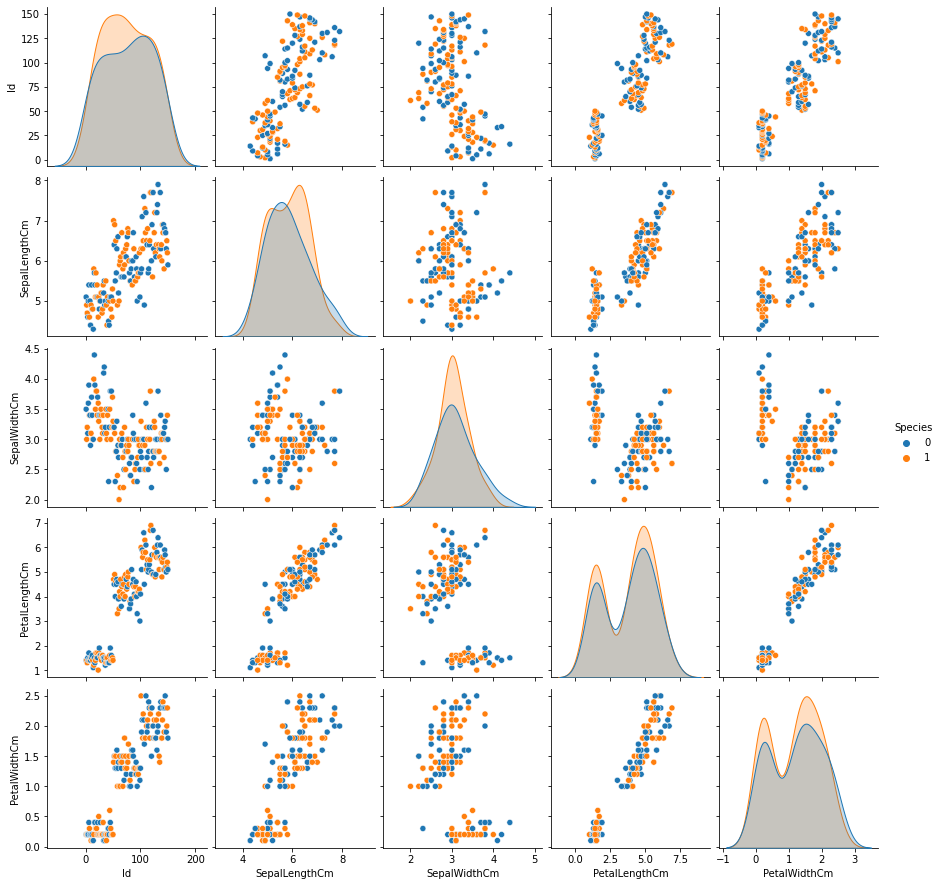

In [7]:
iris["Species"] = np.random.choice(2,150)
sns.pairplot(iris, hue = "Species", size = 2.5)

In [8]:
x = iris.iloc[:, [1,2,3]].values

# We gonna try feature clustering

In [9]:
from sklearn.cluster import KMeans
wcss=[]

[594.0446666666667, 133.4571484147053, 69.5001392446634, 49.50821558441557, 40.395666666666685, 32.9093201288245, 29.094690458494814, 25.55123542319196, 23.380433501281306, 21.812064543299847]


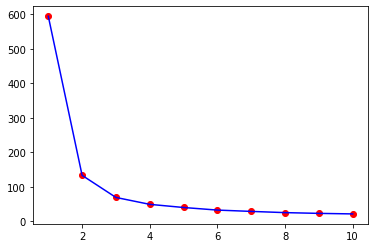

In [10]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,
                  init='k-means++',random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
print(wcss)
x_range=range(1,11)
plt.scatter(x_range,wcss,color='red')
plt.plot(x_range,wcss,color='blue')
plt.show()

# Fit the model

In [11]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=42)

In [12]:
ymeans=kmeans.predict(x)
print(ymeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 2 1 1 3 1 1 1 2
 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2
 2 2]


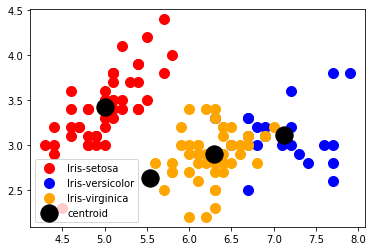

In [13]:
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,color='red',label='Iris-setosa')
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,color='blue',label='Iris-versicolor')
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,color='orange',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,color="black",label='centroid')
plt.legend()
plt.show()